# Segmentación de la Zona Metropolitana de Monterrey

Partiendo de los datos geográficos de diferentes fuentes, se seleccionaron únicamente los sectores hexagonales contenidos dentro del municipio de Monterrey, para posteriormente limitarse únicamente al polígono definido en el centro de la ciudad

In [1]:
import pandas as pd
import json
import geopandas
import shapely
from matplotlib import pyplot as plt
from cartopy import crs as ccrs

c:\Users\soalv\miniconda3\envs\SLearn\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\soalv\miniconda3\envs\SLearn\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\soalv\miniconda3\envs\SLearn\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
# Load data
data_traslados_sium = json.load(open('Transporte.geojson'))
data_regiones_zmm = json.load(open('zmm18_h3_9.json'))
monterrey_gpd = geopandas.read_file('monterrey_geo.json')

gdf_traslados_sium = geopandas.GeoDataFrame.from_features(data_traslados_sium['features'])
gdf_regiones_zmm = geopandas.GeoDataFrame.from_features(data_regiones_zmm['features'])

In [ ]:
centromty_polygon = shapely.Polygon([
    (-100.351,25.705),
    (-100.353,25.671),
    (-100.307,25.662),
    (-100.278,25.673),
    (-100.268,25.683),
    (-100.268,25.703)
])

centromty_gdf = geopandas.GeoDataFrame(geometry=[centromty_polygon])
centromty_gdp = geopandas.GeoSeries([centromty_polygon]).__geo_interface__

In [ ]:
# Select polygons from gdf_regiones_zmm that intersect with centromty_polygon
hex_in_centro = gdf_regiones_zmm.intersects(centromty_polygon)
workingarea = gdf_regiones_zmm[hex_in_centro]

workingarea.head()

,geometry,h3_polyfill,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO
4933,"POLYGON ((-100.27364 25.67624, -100.27234 25.6...",8948a2009d3ffff,19026,19,026,Guadalupe
5258,"POLYGON ((-100.27019 25.67759, -100.26889 25.6...",8948a2009dbffff,19026,19,026,Guadalupe
5354,"POLYGON ((-100.26673 25.67894, -100.26544 25.6...",8948a200837ffff,19026,19,026,Guadalupe
27945,"POLYGON ((-100.32413 25.66618, -100.32283 25.6...",8948a20701bffff,19039,19,039,Monterrey
27948,"POLYGON ((-100.26888 25.68777, -100.26759 25.6...",8948a200943ffff,19039,19,039,Monterrey


In [5]:
hex_mty = gdf_regiones_zmm[gdf_regiones_zmm.intersects(monterrey_gpd.unary_union)]

C:\Users\soalv\AppData\Local\Temp\ipykernel_27240\176390853.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hex_mty = gdf_regiones_zmm[gdf_regiones_zmm.intersects(monterrey_gpd.unary_union)]


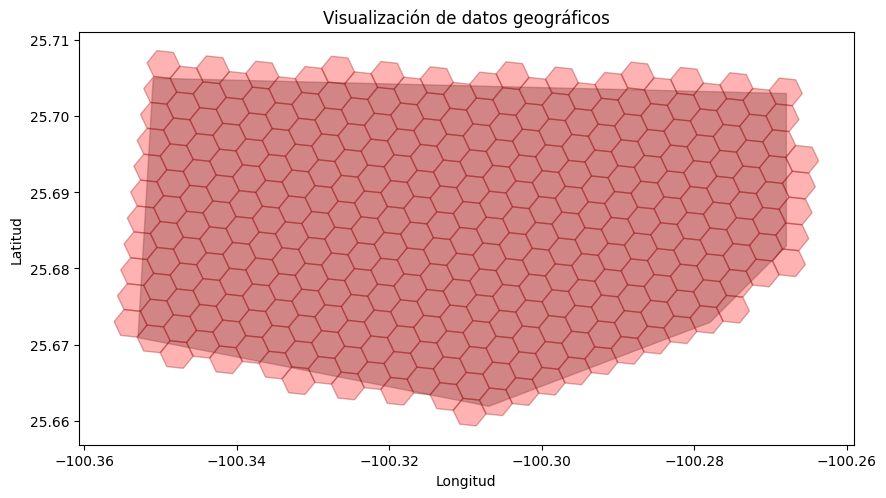

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
centromty_gdf.plot(ax=ax, color='grey', edgecolor='grey', alpha=0.5)
workingarea.plot(ax=ax, color='red', edgecolor='darkred', alpha=0.3)

ax.set_title("Visualización de datos geográficos")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()

In [22]:
# Export working area to geojson
workingarea.to_file('workingarea.geojson', driver='GeoJSON')

c:\Users\soalv\miniconda3\envs\SLearn\Lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [7]:
# Load transit data
data_traslados_zmm = pd.read_csv('day_0.csv')
data_traslados_zmm.head()

,h3_origin,h3_destination,hour_origin,dsemana_origin,count
0,89488482db7ffff,8948a201127ffff,12,0,1
1,89488490867ffff,89488490b93ffff,9,0,1
2,89488490987ffff,89488490867ffff,9,0,1
3,89488490987ffff,8948a20ed9bffff,11,0,1
4,89488490b93ffff,89488490987ffff,10,0,1


In [ ]:
# Get centroids of each hexagon in workingarea
centroids = gdf_regiones_zmm.centroid
centroids = centroids.reset_index(drop=True)

centroids = geopandas.GeoDataFrame(geometry=centroids)
centroids['h3_polyfill'] = gdf_regiones_zmm['h3_polyfill'].values

centroids.head()

,geometry,h3_polyfill
0,POINT (-100.40794 25.94517),8948a23899bffff
1,POINT (-100.41271 25.95943),8948a238933ffff
2,POINT (-100.38285 25.93561),8948a2388c7ffff
3,POINT (-100.41573 25.93568),8948a238d33ffff
4,POINT (-100.41875 25.91192),8948a23ab33ffff


C:\Users\soalv\AppData\Local\Temp\ipykernel_27240\1121888785.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroids_mty = centroids[centroids.intersects(monterrey_gpd.unary_union)]


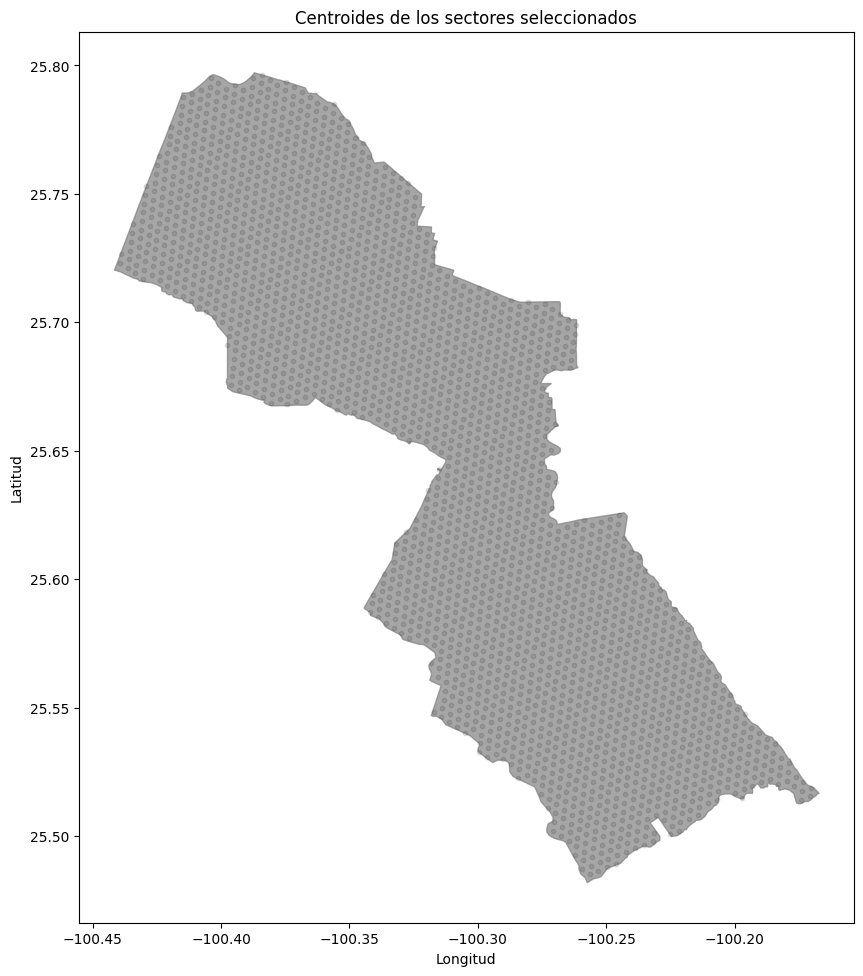

In [9]:
centroids_mty = centroids[centroids.intersects(monterrey_gpd.unary_union)]

# Plot centroids
fig, ax = plt.subplots(figsize=(10, 15))
monterrey_gpd.plot(ax=ax, color='grey', edgecolor='grey', alpha=0.7)
centroids_mty.plot(ax=ax, color='black', edgecolor='black', alpha=0.1, markersize=10)

ax.set_title("Centroides de los sectores seleccionados")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()

In [ ]:
# Convert centroids geodataframe to dataframe
centroids_df = pd.DataFrame(centroids)

reemplazo_traslados = data_traslados_zmm.copy()
reemplazo_traslados['h3_origin'] = reemplazo_traslados['h3_origin'].map(centroids_df.set_index('h3_polyfill')['geometry'])
reemplazo_traslados['h3_destination'] = reemplazo_traslados['h3_destination'].map(centroids_df.set_index('h3_polyfill')['geometry'])

reemplazo_traslados.head()

,h3_origin,h3_destination,hour_origin,dsemana_origin,count
0,POINT (-100.38984 26.37138),POINT (-100.17964 25.65063),12,0,1
1,POINT (-100.34168 26.28368),POINT (-100.34472 26.28573),9,0,1
2,POINT (-100.37161 26.28174),POINT (-100.34168 26.28368),9,0,1
3,POINT (-100.37161 26.28174),POINT (-100.293 25.76431),11,0,1
4,POINT (-100.34472 26.28573),POINT (-100.37161 26.28174),10,0,1


In [ ]:
# Export centroids to geojson
centroids.to_file("centroids.geojson", driver='GeoJSON')

c:\Users\soalv\miniconda3\envs\SLearn\Lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
